In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Test the best s4U concentration for blastocyst

In [4]:
d = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")
d = d[["Late" in x for x in d["Strain"]]]
runs = ["20220729_EmbryoR10", "20230220_BlastocystC85", "20230220_BlastocystC86", "20230220_BlastocystC87"]
d = d[[x in runs for x in d["Run"]]]
d = d[d["UMIs"] >= 5000]
print("Cells:", len(d))
Counter([(s4u, time) for s4u, time in d[["s4U", "Time"]].values])

Cells: 251


Counter({(0.0, 3.0): 37,
         (100.0, 3.0): 3,
         (400.0, 3.0): 77,
         (600.0, 3.0): 33,
         (500.0, 3.0): 35,
         (300.0, 3.0): 34,
         (200.0, 3.0): 32})

In [7]:
s4u_list = [0, 100, 200, 300, 400, 500, 600]
ratios_list = []
for s4u in s4u_list:
    tmp = d[(d["s4U"] == s4u) & (d["Time"] == 3)]
    ratios = tmp["TCRatio"] * 100
    ratios_list.append(ratios)

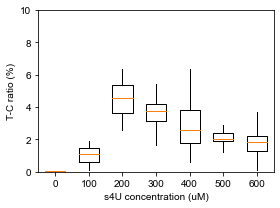

In [10]:
plt.figure(figsize=(4, 3))
for i, ratios in enumerate(ratios_list):
    plt.boxplot([ratios], positions=[i], widths=0.6, showcaps=False, showfliers=False)
xs = np.arange(len(s4u_list))
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.ylim(0, 10)
plt.xticks(xs, list(map(str, s4u_list)))
plt.xlabel("s4U concentration (uM)")
plt.ylabel("T-C ratio (%)")
plt.tight_layout()
plt.savefig("figures/best_s4u_condition.pdf", dpi=300)